In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install bnlp_toolkit
!pip install bnltk
!pip install -U bnlp_toolkit



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 74.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
ERROR: pip's dependency resolver does not currently t

In [ ]:
#Import libraries for data cleanning

import re
from bnltk.stemmer import BanglaStemmer
import pandas as pd

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Thesis Model/Dataset-2/dataset-1.xlsx")
df_train = pd.read_csv("/content/drive/MyDrive/Thesis Model/Dataset-2/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Thesis Model/Dataset-2/test.csv")
df_val = pd.read_csv("/content/drive/MyDrive/Thesis Model/Dataset-2/val.csv")

print("Train Dataset Label Counts:")
print(df_train['Label'].value_counts())
print("\nTest Dataset Label Counts:")
print(df_test['Label'].value_counts())
print("\nValidation Dataset Label Counts:")
print(df_val['Label'].value_counts())

Train Dataset Label Counts:
Label
joy         7669
sadness     4856
anger       3435
love        2277
surprise     744
fear         233
Name: count, dtype: int64

Test Dataset Label Counts:
Label
joy         1434
sadness      991
anger        730
love         464
surprise     150
fear          67
Name: count, dtype: int64

Validation Dataset Label Counts:
Label
joy         1427
sadness      855
anger        620
love         389
surprise     137
fear          32
Name: count, dtype: int64


In [ ]:
# prompt: take df and add 1000 to df_val and 1000 to df_test add rest to df_train

# Add 1000 rows from df to df_val
df_val = pd.concat([df_val, df.iloc[:500]], ignore_index=True)

# Add 1000 rows from df to df_test
df_test = pd.concat([df_test, df.iloc[500:1000]], ignore_index=True)

# Add the remaining rows from df to df_train
df_train = pd.concat([df_train, df.iloc[1000:]], ignore_index=True)

print("\nUpdated Train Dataset Label Counts:")
print(df_train['Label'].value_counts())
print("\nUpdated Test Dataset Label Counts:")
print(df_test['Label'].value_counts())
print("\nUpdated Validation Dataset Label Counts:")
print(df_val['Label'].value_counts())


Updated Train Dataset Label Counts:
Label
joy         10790
sadness      7404
anger        5733
love         2277
surprise     2066
disgust      1817
fear         1563
Name: count, dtype: int64

Updated Test Dataset Label Counts:
Label
joy         1612
sadness     1055
anger        829
love         464
surprise     170
disgust      131
fear          75
Name: count, dtype: int64

Updated Validation Dataset Label Counts:
Label
joy         1595
sadness      926
anger        703
love         389
surprise     161
disgust      131
fear          55
Name: count, dtype: int64


>**Data cleaning and preprocessing**


In [ ]:
from bnlp import CleanText

punkt not found. downloading...


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:

# from bnlp import CleanText
#Preprocessing Part Starts
clean_text_processor = CleanText(
   fix_unicode=True,
   unicode_norm=True,
   unicode_norm_form="NFKC",
   remove_url=True,
   remove_email=True,
   remove_emoji=True,
   remove_number=True,
   remove_digits=True,
   remove_punct=True,
   replace_with_url="",
   replace_with_email="",
   replace_with_number="",
   replace_with_digit="",
   replace_with_punct = ""
)

# Testing
# input_text = "আমার সোনার বাংলা <html/>"
# clean_text = clean_text_processor(input_text)
# print(clean_text)

df_train['Text'] = df_train['Text'].apply(lambda x: clean_text_processor(x))
df_test['Text'] = df_test['Text'].apply(lambda x: clean_text_processor(x))
df_val['Text'] = df_val['Text'].apply(lambda x: clean_text_processor(x))

In [ ]:
import re

In [ ]:
# Removing english words and numbers and then removing extra spcaes
def remove_extra_spaces_and_english(text):
  # Remove English words and numbers
  text = re.sub(r'[a-zA-Z0-9]', '', text)

  # Remove extra whitespace characters
  text = re.sub(r'\s+', ' ', text).strip()

  return text


# Example usage (assuming df_train, df_test, and df_val are defined):
df_train['Text'] = df_train['Text'].apply(remove_extra_spaces_and_english)
df_test['Text'] = df_test['Text'].apply(remove_extra_spaces_and_english)
df_val['Text'] = df_val['Text'].apply(remove_extra_spaces_and_english)


In [ ]:
#Check if there are any empty cells

def check_empty_text(df):
  return df['Text'].isnull().any()

def check_empty_label(df):
  return df['Label'].isnull().any()
print(check_empty_text(df_train))
print(check_empty_label(df_train))


False
False


In [ ]:
# For Deleteing rows with empty cells

def drop_empty_rows(df):
    # Drop rows where 'Text' or 'Label' is empty
    df.dropna(subset=['Text', 'Label'], inplace=True)
    return df

df_train = drop_empty_rows(df_train)
df_test = drop_empty_rows(df_test)
df_val = drop_empty_rows(df_val)

print(check_empty_text(df_train))
print(check_empty_label(df_train))


False
False


In [ ]:
#Checking if there are any sentences with single word in Text Field

def check_single_word_cells(df):
  for index, row in df.iterrows():
    text = row['Text']
    if isinstance(text, str):  # Check if the value is a string
        words = text.split()
        if len(words) == 1 and words[0] != '': #check for empty string after spliting
          return True
  return False

print(check_single_word_cells(df_train))
print(check_single_word_cells(df_test))
print(check_single_word_cells(df_val))


True
False
False


In [ ]:
# Stemmer
from bnltk.stemmer import BanglaStemmer
bn_stemmer = BanglaStemmer()
def stem_bengali_text(text):
    return [bn_stemmer.stem(word) for word in text]

df_train['Text'] = df_train['Text'].apply(lambda x: ' '.join(stem_bengali_text(x.split())))
df_test['Text'] = df_test['Text'].apply(lambda x: ' '.join(stem_bengali_text(x.split())))
df_val['Text'] = df_val['Text'].apply(lambda x: ' '.join(stem_bengali_text(x.split())))

print(df_train.head())
print(df_test.head())
print(df_val.head())

                                                Text    Label
0                               লকাল বাস ভালো এ থাকা  sadness
1    কত অভিজান  চল কিন্তু ওয়াস পানির অভিজান কর না ক  sadness
2  বিয় মহল ছেড় তিনি বিস্রাম নি চল যান নং ছ বিয়...    anger
3                           চাচাজি  কেবল মা ধর্ষণ কর  sadness
4                               সত্যিক মানুষ তারা ভা      joy
                                                Text    Label
0                তারা মন কর ব্রো বলা মান ট্রল ক ব্রো    anger
1                আর কিছু না কারণ রাগ আড়াল লুকিয় থা    anger
2  শালীনতা থাকল ত প্রতি মন থেকে সন্মান জাগ ছোট ভা...      joy
3  নতুন ইনকাম এর পথ খুল পদদা সেতু কাজ শেষ কর গিয়...  sadness
4  মাদরাস ছাএ  পার বল কোনো কথা না ও কব আব পারেনা ...     love
                                                Text    Label
0  চট্রগ্রাম এবং কক্সবাজ বন্যা কবলিত এলাকা ত্রান ...      joy
1  আম কা ছিল শুধু রিহান ফটো এলবাম বছর দুয়েক পর ট...    anger
2                  হারিয় দেখিয় দিলো মাদ্রাসা ছাত্র      joy
3       

In [ ]:
from bnlp import BengaliCorpus as corpus
#Remove stop words
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in corpus.stopwords]
    return " ".join(filtered_words)

df_train['Text'] = df_train['Text'].apply(remove_stopwords)
df_test['Text'] = df_test['Text'].apply(remove_stopwords)
df_val['Text'] = df_val['Text'].apply(remove_stopwords)





In [ ]:
#Check find those texts which are similiar but different in emotion
def find_similar_rows_different_labels(df):


  # Group by 'Text' and check if there are multiple labels for the same text.
  for text, group in df.groupby('Text'):
    if len(group['Label'].unique()) > 1:
      print(f"Similar text '{text}' with different Emotion:")
      print(group[['Text', 'Label']])
      print("-" * 20)

find_similar_rows_different_labels(df_train)
print("------------------")
find_similar_rows_different_labels(df_test)
print("--------------------")
find_similar_rows_different_labels(df_val)


Similar text '' with different Emotion:
      Text     Label
824            anger
1517           anger
2394             joy
3159             joy
3176             joy
5316        surprise
7762             joy
8454            love
9004            love
10654            joy
10750            joy
12815          anger
13175            joy
14168            joy
18056       surprise
18183          anger
18876            joy
19423        disgust
27739        sadness
27916       surprise
28000            joy
28001        sadness
28002            joy
28210            joy
28844        sadness
29665       surprise
29743            joy
29777            joy
30253        sadness
31143           fear
--------------------
Similar text 'অপরাধ কারী অপরাধী প্রশ্রয় দানকারী দুজনে সমান অপরাধী এাো বল মোনাফেক কাফ জারজ নাস্তিক আস্তিক মালউন আরো বল' with different Emotion:
                                                    Text    Label
26474  অপরাধ কারী অপরাধী প্রশ্রয় দানকারী দুজনে সমান ...    anger
26513  অপরা

In [ ]:
# #Deleting those rows which are similiar in Text columns and different in Label columns

def remove_conflicting_rows(df):
    """Removes rows with identical 'Text' but different 'Label' values."""

    # Group by 'Text' and get unique labels for each group
    grouped = df.groupby('Text')['Label'].unique()

    # Find texts with more than one unique label
    conflicting_texts = grouped[grouped.apply(len) > 1].index

    # Filter out rows with conflicting texts
    df_filtered = df[~df['Text'].isin(conflicting_texts)]

    return df_filtered

df_train = remove_conflicting_rows(df_train)
df_test = remove_conflicting_rows(df_test)
df_val = remove_conflicting_rows(df_val)


In [ ]:
#Checking
find_similar_rows_different_labels(df_train)
print("------------------")
find_similar_rows_different_labels(df_test)
print("--------------------")
find_similar_rows_different_labels(df_val)

------------------
--------------------


In [ ]:
print(df_train.shape)
print(df_test.shape)
print(df_val.shape)

(31051, 2)
(4309, 2)
(3941, 2)


> Machine Learning Models (Logistic Regression, Decision Tree, SVM, Random Forest)



In [ ]:
#Preprocess text
X_train = df_train['Text'].values
y_train = df_train['Label'].values

X_test = df_test['Text'].values
y_test = df_test['Label'].values

X_val = df_val['Text'].values
y_val = df_val['Label'].values


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Modelling
from sklearn.model_selection import train_test_split,KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.svm import SVC

#For showing confusiong matrix and performance chart
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support


In [ ]:
def train_model(model, data, targets):
    """
    Train a model on the given data and targets.

    Parameters:
    model (sklearn model): The model to be trained.
    data (list of str): The input data.
    targets (list of str): The targets.

    Returns:
    Pipeline: The trained model as a Pipeline object.
    """
    # Create a Pipeline object with a TfidfVectorizer and the given model
    text_clf = Pipeline([('vect',TfidfVectorizer()),
                         ('clf', model)])
    # Fit the model on the data and targets
    text_clf.fit(data, targets)
    return text_clf

In [ ]:
def get_F1(trained_model,X,y):
    """
    Get the F1 score for the given model on the given data and targets.

    Parameters:
    trained_model (sklearn model): The trained model.
    X (list of str): The input data.
    y (list of str): The targets.

    Returns:
    array: The F1 score for each class.
    """
    # Make predictions on the input data using the trained model
    predicted=trained_model.predict(X)
    # Calculate the F1 score for the predictions
    f1=f1_score(y,predicted, average=None)
    # Return the F1 score
    return f1

In [ ]:
#Train the model with the training data
log_reg = train_model(LogisticRegression(solver='liblinear',random_state = 0), X_train, y_train)

In [ ]:
#Make a single prediction
y_pred=log_reg.predict(['খারাপ'])
y_pred

array(['joy'], dtype=object)

#1. Logistic Regression

In [ ]:
#test the model with the test data
y_pred=log_reg.predict(X_test)

#calculate the accuracy
log_reg_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', log_reg_accuracy,'\n')

#calculate the F1 score
f1_Score = get_F1(log_reg,X_test,y_test)
pd.DataFrame(f1_Score, index=df_train.Label.unique(), columns=['F1 score'])

Accuracy:  0.5061499187746576 



,F1 score
sadness,0.344720
anger,0.000000
joy,0.178218
love,0.636015
surprise,0.202166
fear,0.510441
disgust,0.150235


Accuracy:  0.5061499187746576 

              precision    recall  f1-score   support

       anger       0.48      0.27      0.34       823
     disgust       0.00      0.00      0.00       131
        fear       0.35      0.12      0.18        75
         joy       0.52      0.83      0.64      1598
        love       0.58      0.12      0.20       458
     sadness       0.50      0.52      0.51      1055
    surprise       0.36      0.09      0.15       169

    accuracy                           0.51      4309
   macro avg       0.40      0.28      0.29      4309
weighted avg       0.49      0.51      0.46      4309

          Precision     Recall   F1 Score
anger     47.741935  26.974484  34.472050
disgust    0.000000   0.000000   0.000000
fear      34.615385  12.000000  17.821782
joy       51.512801  83.103880  63.601533
love      58.333333  12.227074  20.216606
sadness   50.000000  52.132701  51.044084
surprise  36.363636   9.467456  15.023474


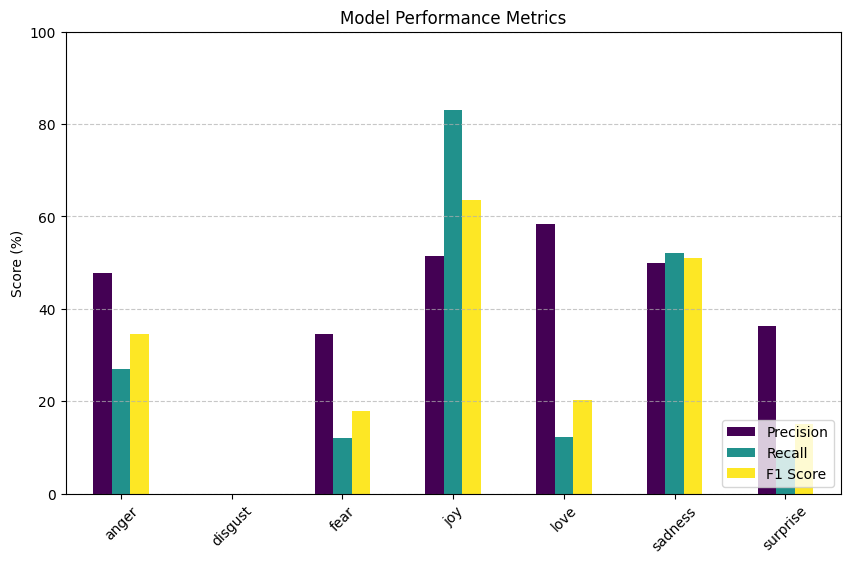

In [ ]:
# Predict using the model
y_pred = log_reg.predict(X_test)

# Calculate accuracy
log_reg_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', log_reg_accuracy, '\n')

# Classification Report
print(classification_report(y_test, y_pred))

# Compute precision, recall, f1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
labels = sorted(set(y_test))  # Ensure correct label order

# Convert to DataFrame
metrics_df = pd.DataFrame({'Precision': precision * 100, 'Recall': recall * 100, 'F1 Score': f1_score * 100}, index=labels)

# Check if DataFrame is populated
print(metrics_df)

# Plot Performance Table (F1 Score, Recall, Precision)
plt.figure(figsize=(10, 6))
metrics_df.plot(kind='bar', colormap='viridis', ax=plt.gca())  # Use `ax=plt.gca()` for correct rendering
plt.ylim(0, 100)  # Ensure bars are visible
plt.title("Model Performance Metrics")
plt.ylabel("Score (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.show()

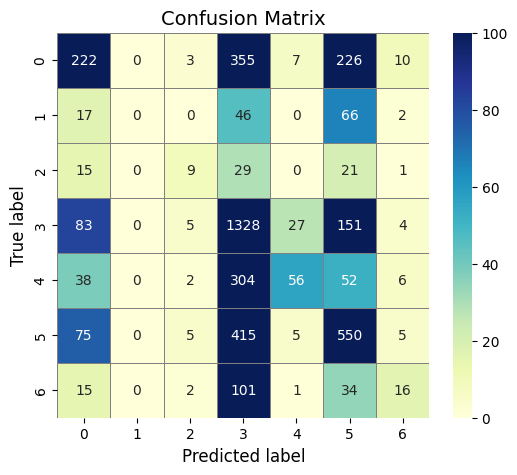

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set figure size
plt.figure(figsize=(6, 5))

# Plot confusion matrix with the desired style
sns.heatmap(cm, annot=True, fmt="g", cmap="YlGnBu", linewidths=0.5, linecolor='gray', vmin=0, vmax=100)

# Labels and title
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted label", fontsize=12)
plt.ylabel("True label", fontsize=12)

# Show plot
plt.show()


#2. Decision Tree

In [ ]:
#Train the model with the training data
DT = train_model(DecisionTreeClassifier(random_state = 0), X_train, y_train)

#test the model with the test data
y_pred=DT.predict(X_test)

#calculate the accuracy
DT_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', DT_accuracy,'\n')

# #calculate the F1 score
# f1_Score = get_F1(DT,X_test,y_test)
# pd.DataFrame(f1_Score, index=df_train.Label.unique(), columns=['F1 score'])

Accuracy:  0.804595033650499 



              precision    recall  f1-score   support

       anger       0.83      0.75      0.79       823
     disgust       0.49      0.14      0.21       131
        fear       0.79      0.81      0.80        75
         joy       0.75      0.93      0.83      1598
        love       0.92      0.75      0.83       458
     sadness       0.85      0.78      0.81      1055
    surprise       0.89      0.64      0.74       169

    accuracy                           0.80      4309
   macro avg       0.79      0.69      0.72      4309
weighted avg       0.81      0.80      0.80      4309

          Precision     Recall   F1 Score
anger     83.445491  75.334143  79.182631
disgust   48.648649  13.740458  21.428571
fear      79.220779  81.333333  80.263158
joy       74.924774  93.491865  83.184855
love      92.245989  75.327511  82.932692
sadness   85.254413  77.819905  81.367691
surprise  89.256198  63.905325  74.482759


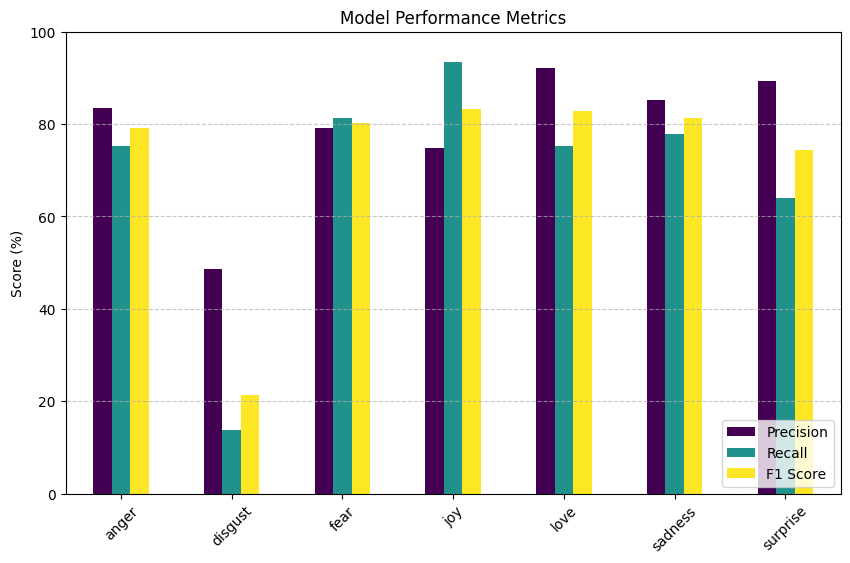

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

# Compute precision, recall, f1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
labels = sorted(set(y_test))  # Ensure correct label order

# Convert to DataFrame
metrics_df = pd.DataFrame({'Precision': precision * 100, 'Recall': recall * 100, 'F1 Score': f1_score * 100}, index=labels)

# Check if DataFrame is populated
print(metrics_df)

# Plot Performance Table (F1 Score, Recall, Precision)
plt.figure(figsize=(10, 6))
metrics_df.plot(kind='bar', colormap='viridis', ax=plt.gca())  # Use `ax=plt.gca()` for correct rendering
plt.ylim(0, 100)  # Ensure bars are visible
plt.title("Model Performance Metrics")
plt.ylabel("Score (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.show()

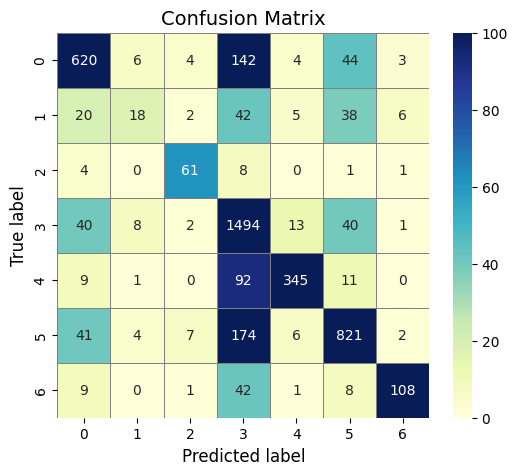

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set figure size
plt.figure(figsize=(6, 5))

# Plot confusion matrix with the desired style
sns.heatmap(cm, annot=True, fmt="g", cmap="YlGnBu", linewidths=0.5, linecolor='gray', vmin=0, vmax=100)

# Labels and title
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted label", fontsize=12)
plt.ylabel("True label", fontsize=12)

# Show plot
plt.show()

# 3. SVM

In [ ]:
#Train the model with the training data
SVM = train_model(SVC(random_state = 0), X_train, y_train)

#test the model with the test data
y_pred=SVM.predict(X_test)

#calculate the accuracy
SVM_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', SVM_accuracy,'\n')

#calculate the F1 score
# f1_Score = get_F1(SVM,X_test,y_test)
# pd.DataFrame(f1_Score, index=df_train.Label.unique(), columns=['F1 score'])

Accuracy:  0.6507310280807612 



              precision    recall  f1-score   support

       anger       0.74      0.52      0.61       823
     disgust       1.00      0.03      0.06       131
        fear       0.72      0.31      0.43        75
         joy       0.61      0.91      0.73      1598
        love       0.85      0.24      0.38       458
     sadness       0.66      0.71      0.68      1055
    surprise       0.69      0.21      0.33       169

    accuracy                           0.65      4309
   macro avg       0.75      0.42      0.46      4309
weighted avg       0.69      0.65      0.62      4309

           Precision     Recall   F1 Score
anger      74.430823  51.640340  60.975610
disgust   100.000000   3.053435   5.925926
fear       71.875000  30.666667  42.990654
joy        61.099454  91.113892  73.147450
love       84.848485  24.454148  37.966102
sadness    65.903084  70.900474  68.310502
surprise   69.230769  21.301775  32.579186


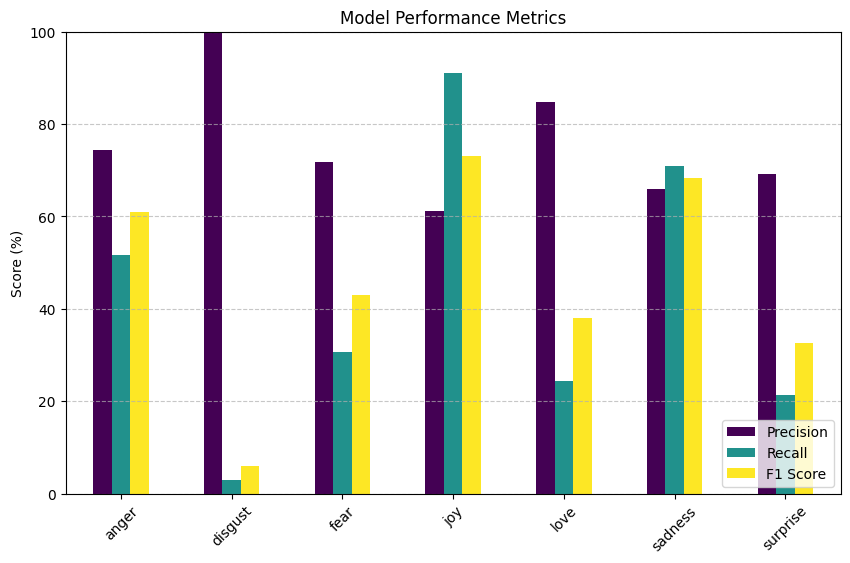

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

# Compute precision, recall, f1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
labels = sorted(set(y_test))  # Ensure correct label order

# Convert to DataFrame
metrics_df = pd.DataFrame({'Precision': precision * 100, 'Recall': recall * 100, 'F1 Score': f1_score * 100}, index=labels)

# Check if DataFrame is populated
print(metrics_df)

# Plot Performance Table (F1 Score, Recall, Precision)
plt.figure(figsize=(10, 6))
metrics_df.plot(kind='bar', colormap='viridis', ax=plt.gca())  # Use `ax=plt.gca()` for correct rendering
plt.ylim(0, 100)  # Ensure bars are visible
plt.title("Model Performance Metrics")
plt.ylabel("Score (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.show()

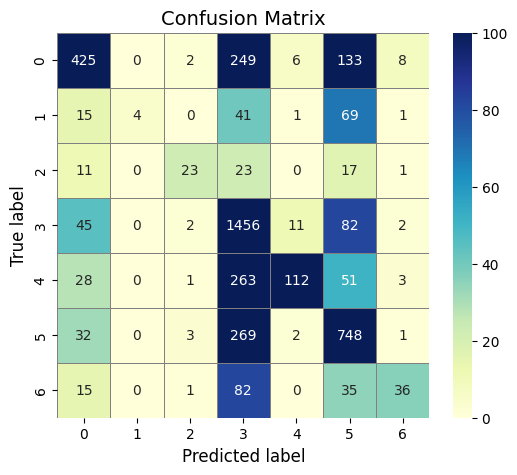

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set figure size
plt.figure(figsize=(6, 5))

# Plot confusion matrix with the desired style
sns.heatmap(cm, annot=True, fmt="g", cmap="YlGnBu", linewidths=0.5, linecolor='gray', vmin=0, vmax=100)

# Labels and title
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted label", fontsize=12)
plt.ylabel("True label", fontsize=12)

# Show plot
plt.show()

# Random Forest

In [ ]:
#Train the model with the training data
RF = train_model(RandomForestClassifier(random_state = 0), X_train, y_train)

#test the model with the test data
y_pred=RF.predict(X_test)

#calculate the accuracy
RF_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', RF_accuracy,'\n')

#calculate the F1 score
# f1_Score = get_F1(RF, X_test, y_test)
# pd.DataFrame(f1_Score, index=df_train.Label.unique(), columns=['F1 score'])

Accuracy:  0.8108609886284521 



              precision    recall  f1-score   support

       anger       0.88      0.73      0.80       823
     disgust       0.74      0.13      0.22       131
        fear       0.87      0.80      0.83        75
         joy       0.75      0.95      0.84      1598
        love       0.93      0.76      0.84       458
     sadness       0.82      0.80      0.81      1055
    surprise       0.92      0.64      0.76       169

    accuracy                           0.81      4309
   macro avg       0.85      0.69      0.73      4309
weighted avg       0.82      0.81      0.80      4309

          Precision     Recall   F1 Score
anger     88.313609  72.539490  79.653102
disgust   73.913043  12.977099  22.077922
fear      86.956522  80.000000  83.333333
joy       75.086505  95.056320  83.899475
love      93.085106  76.419214  83.932854
sadness   82.226562  79.810427  81.000481
surprise  92.372881  64.497041  75.958188


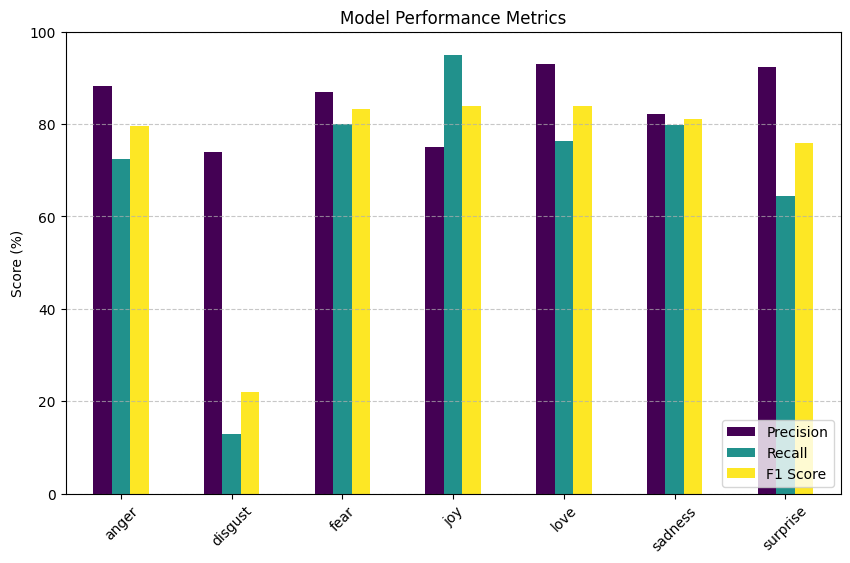

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

# Compute precision, recall, f1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
labels = sorted(set(y_test))  # Ensure correct label order

# Convert to DataFrame
metrics_df = pd.DataFrame({'Precision': precision * 100, 'Recall': recall * 100, 'F1 Score': f1_score * 100}, index=labels)

# Check if DataFrame is populated
print(metrics_df)

# Plot Performance Table (F1 Score, Recall, Precision)
plt.figure(figsize=(10, 6))
metrics_df.plot(kind='bar', colormap='viridis', ax=plt.gca())  # Use `ax=plt.gca()` for correct rendering
plt.ylim(0, 100)  # Ensure bars are visible
plt.title("Model Performance Metrics")
plt.ylabel("Score (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.show()

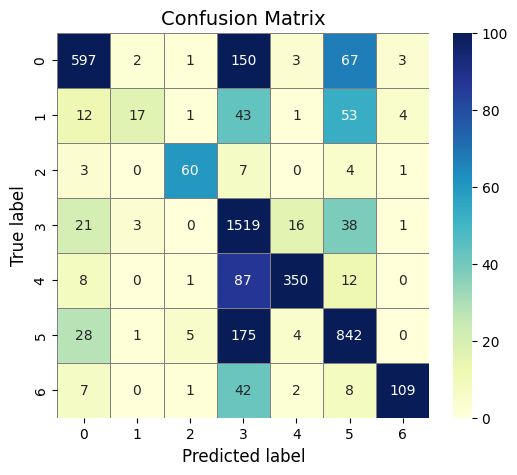

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set figure size
plt.figure(figsize=(6, 5))

# Plot confusion matrix with the desired style
sns.heatmap(cm, annot=True, fmt="g", cmap="YlGnBu", linewidths=0.5, linecolor='gray', vmin=0, vmax=100)

# Labels and title
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted label", fontsize=12)
plt.ylabel("True label", fontsize=12)

# Show plot
plt.show()

# All ML Performance Table

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree','Support Vector Machine','Random Forest'],
    'Accuracy': [log_reg_accuracy, DT_accuracy, SVM_accuracy, RF_accuracy]})

models.sort_values(by='Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

,Model,Accuracy
0,Random Forest,0.810861
1,Decision Tree,0.804595
2,Support Vector Machine,0.650731
3,Logistic Regression,0.506150


# Deep Learning Models


**CNN With additional reuglarization**





In [ ]:
#Foysals Code
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, BatchNormalization
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Tokenization
vocab_size = 5000  # Keeping it optimal
max_length = 100
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")

df_train['Text'] = df_train['Text'].str.lower()  # Normalize case
df_test['Text'] = df_test['Text'].str.lower()
df_val['Text'] = df_val['Text'].str.lower()

tokenizer.fit_on_texts(df_train['Text'])

# Convert texts to sequences
train_sequences = tokenizer.texts_to_sequences(df_train['Text'])
test_sequences = tokenizer.texts_to_sequences(df_test['Text'])
val_sequences = tokenizer.texts_to_sequences(df_val['Text'])

# Padding sequences
X_train = pad_sequences(train_sequences, maxlen=max_length, padding='post')
X_test = pad_sequences(test_sequences, maxlen=max_length, padding='post')
X_val = pad_sequences(val_sequences, maxlen=max_length, padding='post')

# Label Encoding
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(df_train['Label'])
y_test = label_encoder.transform(df_test['Label'])
y_val = label_encoder.transform(df_val['Label'])

num_classes = len(label_encoder.classes_)
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)

# CNN Model with Additional Regularization
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    Conv1D(filters=256, kernel_size=5, activation='relu', padding='same'),
    BatchNormalization(),  # Helps with training stability
    GlobalMaxPooling1D(),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)),  # L2 Regularization
    Dropout(0.5),  # Prevent overfitting
    Dense(num_classes, activation='softmax')
])

# Compile with Learning Rate Scheduling
initial_learning_rate = 0.0005
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Early Stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,  # Stop training if val_loss doesn't improve for 3 epochs
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]  # Added early stopping
)

# Evaluate on test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate F1-score table
report = classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_, output_dict=True)
f1_df = pd.DataFrame(report).transpose()
print(f1_df)


test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/30
971/971 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3774 - loss: 2.6212 - val_accuracy: 0.6029 - val_loss: 1.2575
Epoch 2/30
971/971 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5566 - loss: 1.3299 - val_accuracy: 0.7229 - val_loss: 0.9393
Epoch 3/30
971/971 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6855 - loss: 0.9520 - val_accuracy: 0.8041 - val_loss: 0.7214
Epoch 4/30
971/971 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8203 - loss: 0.6200 - val_accuracy: 0.8602 - val_loss: 0.5922
Epoch 5/30
971/971 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9061 - loss: 0.3916 - val_accuracy: 0.8863 - val_loss: 0.5386
Epoch 6/30
971/971 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9448 - loss: 0.2771 - val_accuracy: 0.8982 - val_loss: 0.5224
Epoch 7/30
971/971 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9617 - loss: 0.2137 - val_accuracy: 0.9003 - val_loss: 0.5387
Epoch 8/30
971/971 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9720 - loss: 0.1719 - val_accuracy: 0

              precision    recall  f1-score   support

       anger       0.90      0.87      0.89       823
     disgust       0.64      0.23      0.34       131
        fear       0.93      0.88      0.90        75
         joy       0.91      0.97      0.94      1598
        love       0.93      0.90      0.91       458
     sadness       0.91      0.93      0.92      1055
    surprise       0.91      0.83      0.87       169

    accuracy                           0.91      4309
   macro avg       0.87      0.80      0.82      4309
weighted avg       0.90      0.91      0.90      4309

          Precision     Recall   F1 Score
anger     90.087829  87.241798  88.641975
disgust   63.829787  22.900763  33.707865
fear      92.957746  88.000000  90.410959
joy       90.612245  97.246558  93.812255
love      92.776524  89.737991  91.231964
sadness   90.749306  92.985782  91.853933
surprise  90.967742  83.431953  87.037037


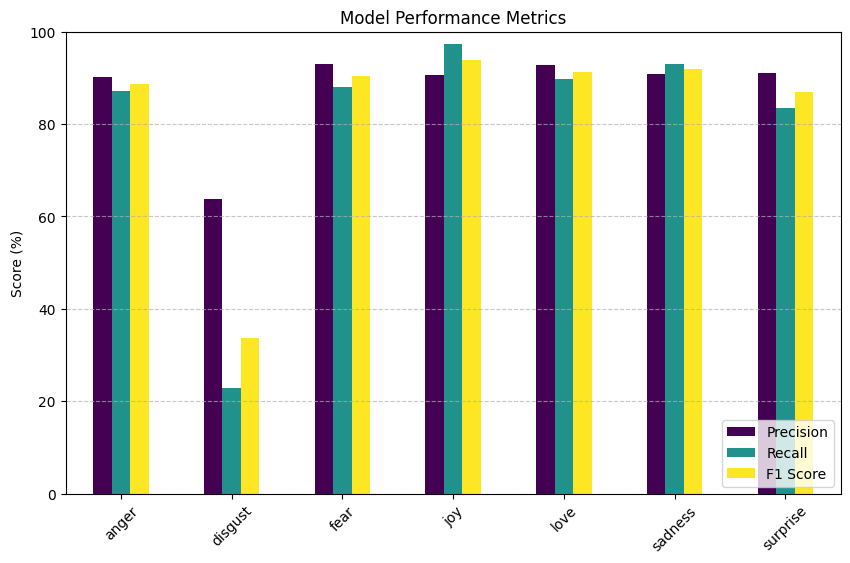

In [ ]:

# Generate classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Compute precision, recall, f1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true_classes, y_pred_classes, average=None)
labels = label_encoder.classes_  # Ensure correct label order

# Convert to DataFrame
metrics_df = pd.DataFrame({'Precision': precision * 100, 'Recall': recall * 100, 'F1 Score': f1_score * 100}, index=labels)

# Check if DataFrame is populated
print(metrics_df)

# Plot Performance Table (F1 Score, Recall, Precision)
plt.figure(figsize=(10, 6))
metrics_df.plot(kind='bar', colormap='viridis', ax=plt.gca())  # Use `ax=plt.gca()` for correct rendering
plt.ylim(0, 100)  # Ensure bars are visible
plt.title("Model Performance Metrics")
plt.ylabel("Score (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.show()


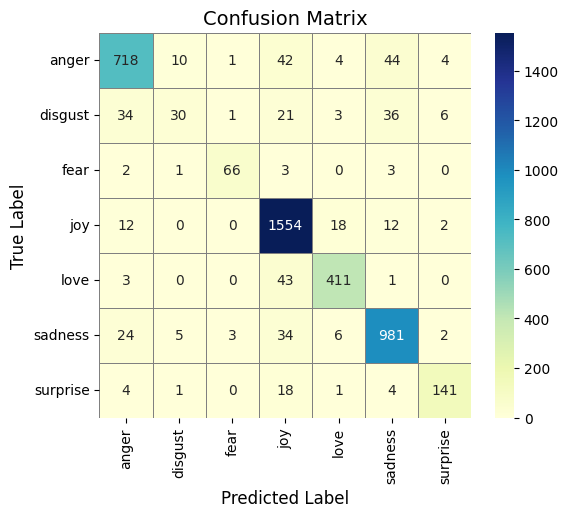

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Convert numerical labels to emotion labels
emotion_labels = label_encoder.classes_

# Set figure size
plt.figure(figsize=(6, 5))

# Plot confusion matrix with emotion labels
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5,
            linecolor='gray', xticklabels=emotion_labels, yticklabels=emotion_labels)

# Labels and title
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)

# Show plot
plt.show()

**Bi-LSTM**

In [ ]:
#Bi-LSTM
import numpy as np
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout

# Tokenization
tokenizer = Tokenizer()
# tokenizer.fit_on_texts(train_data["Text"])
tokenizer.fit_on_texts(df_train["Text"])

# Convert text to sequences
# X_train = tokenizer.texts_to_sequences(train_data["Text"])
X_train = tokenizer.texts_to_sequences(df_train["Text"])
X_test = tokenizer.texts_to_sequences(df_test["Text"])
X_val = tokenizer.texts_to_sequences(df_val["Text"])

# Padding
max_len = max(len(seq) for seq in X_train)
X_train = pad_sequences(X_train, maxlen=max_len, padding='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')
X_val = pad_sequences(X_val, maxlen=max_len, padding='post')

# Label Encoding
label_encoder = LabelEncoder()
# y_train = label_encoder.fit_transform(train_data["Label"])
y_train = label_encoder.fit_transform(df_train["Label"])
y_test = label_encoder.transform(df_test["Label"])
y_val = label_encoder.transform(df_val["Label"])

# Define Bi-LSTM Model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 128

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early Stopping Function
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,  # Stop training if val_loss doesn't improve for 3 epochs
    restore_best_weights=True
)


# Train model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32,callbacks=[early_stopping] )

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")



Epoch 1/10
971/971 ━━━━━━━━━━━━━━━━━━━━ 63s 55ms/step - accuracy: 0.3990 - loss: 1.5906 - val_accuracy: 0.5775 - val_loss: 1.1075
Epoch 2/10
971/971 ━━━━━━━━━━━━━━━━━━━━ 75s 53ms/step - accuracy: 0.5582 - loss: 1.1696 - val_accuracy: 0.6849 - val_loss: 0.8640
Epoch 3/10
971/971 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.6891 - loss: 0.8583 - val_accuracy: 0.7846 - val_loss: 0.6953
Epoch 4/10
971/971 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.8033 - loss: 0.6063 - val_accuracy: 0.8153 - val_loss: 0.6087
Epoch 5/10
971/971 ━━━━━━━━━━━━━━━━━━━━ 52s 53ms/step - accuracy: 0.8638 - loss: 0.4241 - val_accuracy: 0.8330 - val_loss: 0.5870
Epoch 6/10
971/971 ━━━━━━━━━━━━━━━━━━━━ 52s 53ms/step - accuracy: 0.8959 - loss: 0.3183 - val_accuracy: 0.8445 - val_loss: 0.5894
Epoch 7/10
971/971 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.9184 - loss: 0.2509 - val_accuracy: 0.8564 - val_loss: 0.6224
Epoch 8/10
971/971 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.9283 - loss: 0.2095 - 

135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step
              precision    recall  f1-score      support
anger          0.837550  0.764277  0.799238   823.000000
disgust        0.491803  0.229008  0.312500   131.000000
fear           0.852941  0.773333  0.811189    75.000000
joy            0.853757  0.924280  0.887620  1598.000000
love           0.843602  0.777293  0.809091   458.000000
sadness        0.845614  0.913744  0.878360  1055.000000
surprise       0.875912  0.710059  0.784314   169.000000
accuracy       0.843351  0.843351  0.843351     0.843351
macro avg      0.800169  0.727428  0.754616  4309.000000
weighted avg   0.837439  0.843351  0.837259  4309.000000
   Category  Precision     Recall   F1 Score
0     anger  83.754993  76.427704  79.923761
1   disgust  49.180328  22.900763  31.250000
2      fear  85.294118  77.333333  81.118881
3       joy  85.375723  92.428035  88.762019
4      love  84.360190  77.729258  80.909091
5   sadness  84.561404  91.374408  87.835991
6  surprise  87.

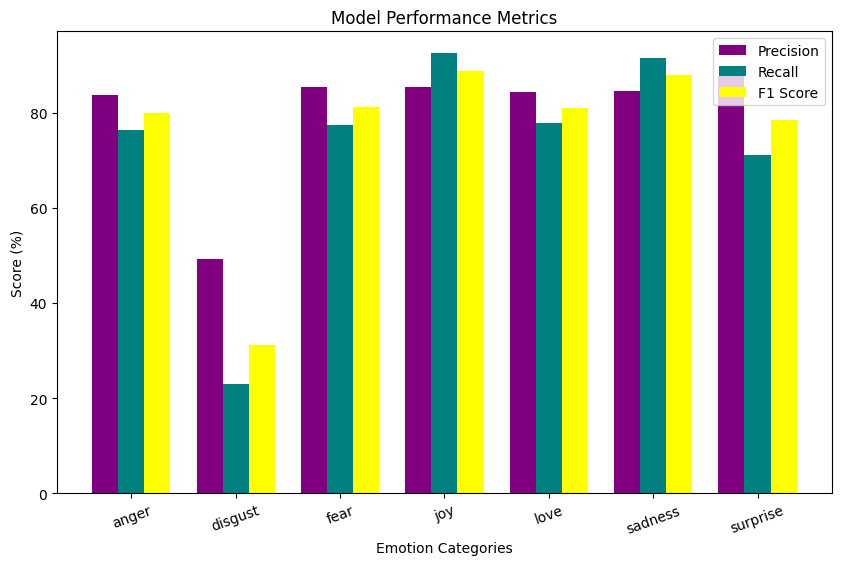

In [ ]:
# Predict on test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_, output_dict=True)

# Convert report to DataFrame
performance_df = pd.DataFrame(report).transpose()
print(performance_df)

# Extract relevant metrics for plotting
categories = label_encoder.classes_
precision = [report[label]['precision'] * 100 for label in categories]
recall = [report[label]['recall'] * 100 for label in categories]
f1_score = [report[label]['f1-score'] * 100 for label in categories]

# Create performance table similar to your screenshot
performance_table = pd.DataFrame({
    'Category': categories,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score
})
print(performance_table)

# Plot bar chart
bar_width = 0.25
x_indexes = np.arange(len(categories))

plt.figure(figsize=(10, 6))
plt.bar(x_indexes, precision, width=bar_width, label='Precision', color='purple')
plt.bar(x_indexes + bar_width, recall, width=bar_width, label='Recall', color='teal')
plt.bar(x_indexes + 2 * bar_width, f1_score, width=bar_width, label='F1 Score', color='yellow')

# Formatting the plot
plt.xlabel('Emotion Categories')
plt.ylabel('Score (%)')
plt.title('Model Performance Metrics')
plt.xticks(ticks=x_indexes + bar_width, labels=categories, rotation=20)
plt.legend()
plt.show()


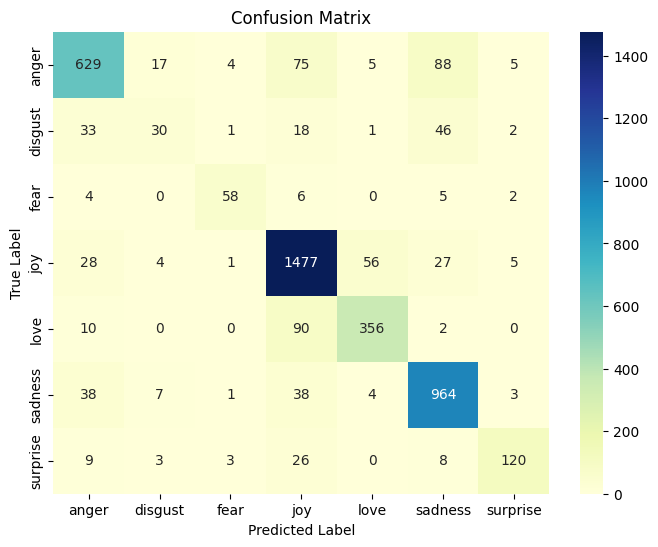

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**Bi-GRU**


In [ ]:
import numpy as np
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
# Tokenization
tokenizer = Tokenizer()
# tokenizer.fit_on_texts(train_data["Text"])
tokenizer.fit_on_texts(df_train["Text"])
# Convert text to sequences
# X_train = tokenizer.texts_to_sequences(train_data["Text"])
X_train = tokenizer.texts_to_sequences(df_train["Text"])
X_test = tokenizer.texts_to_sequences(df_test["Text"])
X_val = tokenizer.texts_to_sequences(df_val["Text"])
# Padding
max_len = max(len(seq) for seq in X_train)
X_train = pad_sequences(X_train, maxlen=max_len, padding='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')
X_val = pad_sequences(X_val, maxlen=max_len, padding='post')
# Label Encoding
label_encoder = LabelEncoder()
# y_train = label_encoder.fit_transform(train_data["Label"])
y_train = label_encoder.fit_transform(df_train["Label"])
y_test = label_encoder.transform(df_test["Label"])
y_val = label_encoder.transform(df_val["Label"])
# implement gru

from tensorflow.keras.layers import GRU

# Define GRU Model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 128
# Early Stopping Function

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,  # Stop training if val_loss doesn't improve for 3 epochs
    restore_best_weights=True
)

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Bidirectional(GRU(128, return_sequences=True)),  # Using GRU layer
    Dropout(0.5),
    Bidirectional(GRU(64)),  # Using GRU layer
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32,callbacks=[early_stopping])

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/10
971/971 ━━━━━━━━━━━━━━━━━━━━ 56s 53ms/step - accuracy: 0.4019 - loss: 1.5725 - val_accuracy: 0.6361 - val_loss: 1.0190
Epoch 2/10
971/971 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.5922 - loss: 1.1093 - val_accuracy: 0.7468 - val_loss: 0.7853
Epoch 3/10
971/971 ━━━━━━━━━━━━━━━━━━━━ 51s 52ms/step - accuracy: 0.7346 - loss: 0.7764 - val_accuracy: 0.7937 - val_loss: 0.6501
Epoch 4/10
971/971 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.8326 - loss: 0.5239 - val_accuracy: 0.8414 - val_loss: 0.5585
Epoch 5/10
971/971 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.8874 - loss: 0.3501 - val_accuracy: 0.8503 - val_loss: 0.5756
Epoch 6/10
971/971 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.9137 - loss: 0.2686 - val_accuracy: 0.8612 - val_loss: 0.6192
Epoch 7/10
971/971 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.9287 - loss: 0.2185 - val_accuracy: 0.8721 - val_loss: 0.6321
135/135 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8634 - loss: 0.3844
Test Accuracy:

135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step
              precision    recall  f1-score      support
anger          0.797767  0.781288  0.789441   823.000000
disgust        0.545455  0.229008  0.322581   131.000000
fear           0.767123  0.746667  0.756757    75.000000
joy            0.853211  0.931164  0.890485  1598.000000
love           0.834975  0.740175  0.784722   458.000000
sadness        0.878903  0.880569  0.879735  1055.000000
surprise       0.744048  0.739645  0.741840   169.000000
accuracy       0.837781  0.837781  0.837781     0.837781
macro avg      0.774497  0.721216  0.737937  4309.000000
weighted avg   0.831837  0.837781  0.831890  4309.000000
   Category  Precision     Recall   F1 Score
0     anger  79.776675  78.128797  78.944138
1   disgust  54.545455  22.900763  32.258065
2      fear  76.712329  74.666667  75.675676
3       joy  85.321101  93.116395  89.048474
4      love  83.497537  74.017467  78.472222
5   sadness  87.890255  88.056872  87.973485
6  surprise  74.

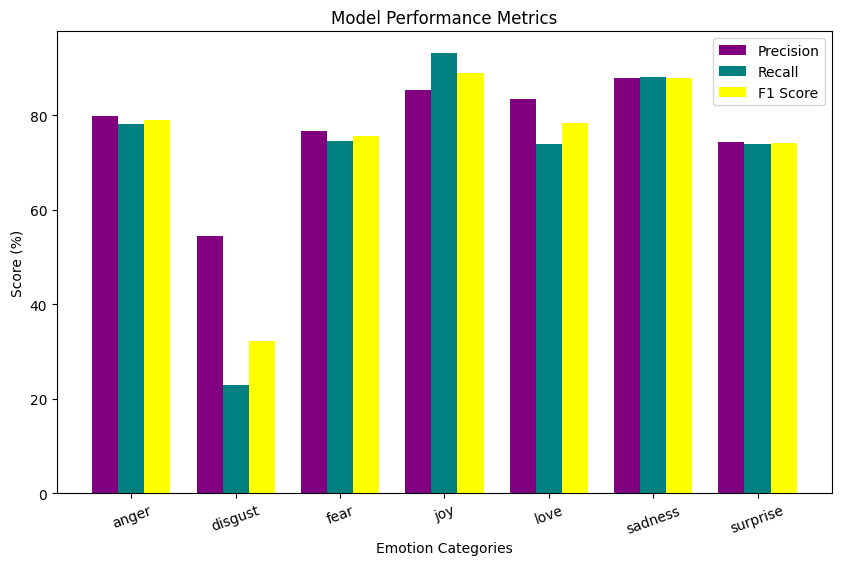

In [ ]:

# Predict on test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_, output_dict=True)

# Convert report to DataFrame
performance_df = pd.DataFrame(report).transpose()
print(performance_df)

# Extract relevant metrics for plotting
categories = label_encoder.classes_
precision = [report[label]['precision'] * 100 for label in categories]
recall = [report[label]['recall'] * 100 for label in categories]
f1_score = [report[label]['f1-score'] * 100 for label in categories]

# Create performance table similar to your screenshot
performance_table = pd.DataFrame({
    'Category': categories,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score
})
print(performance_table)

# Plot bar chart
bar_width = 0.25
x_indexes = np.arange(len(categories))

plt.figure(figsize=(10, 6))
plt.bar(x_indexes, precision, width=bar_width, label='Precision', color='purple')
plt.bar(x_indexes + bar_width, recall, width=bar_width, label='Recall', color='teal')
plt.bar(x_indexes + 2 * bar_width, f1_score, width=bar_width, label='F1 Score', color='yellow')

# Formatting the plot
plt.xlabel('Emotion Categories')
plt.ylabel('Score (%)')
plt.title('Model Performance Metrics')
plt.xticks(ticks=x_indexes + bar_width, labels=categories, rotation=20)
plt.legend()
plt.show()


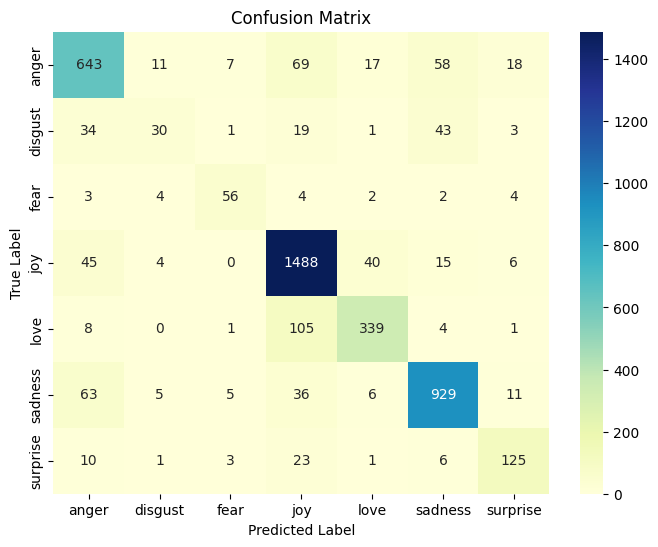

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**CNN Model With Fine-tuning**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(df_train['Text'])

# Convert texts to sequences
df_train['text_sequences'] = tokenizer.texts_to_sequences(df_train['Text'])
df_test['text_sequences'] = tokenizer.texts_to_sequences(df_test['Text'])
df_val['text_sequences'] = tokenizer.texts_to_sequences(df_val['Text'])

# Padding
max_length = 100
df_train['padded_sequences'] = list(pad_sequences(df_train['text_sequences'], maxlen=max_length, padding='post'))
df_test['padded_sequences'] = list(pad_sequences(df_test['text_sequences'], maxlen=max_length, padding='post'))
df_val['padded_sequences'] = list(pad_sequences(df_val['text_sequences'], maxlen=max_length, padding='post'))

# Label Encoding
label_encoder = LabelEncoder()
df_train['label_encoded'] = label_encoder.fit_transform(df_train['Label'])
df_test['label_encoded'] = label_encoder.transform(df_test['Label'])
df_val['label_encoded'] = label_encoder.transform(df_val['Label'])

num_classes = len(label_encoder.classes_)

y_train = to_categorical(df_train['label_encoded'], num_classes=num_classes)
y_test = to_categorical(df_test['label_encoded'], num_classes=num_classes)
y_val = to_categorical(df_val['label_encoded'], num_classes=num_classes)

# Convert to NumPy arrays
X_train = np.array(df_train['padded_sequences'].tolist())
X_test = np.array(df_test['padded_sequences'].tolist())
X_val = np.array(df_val['padded_sequences'].tolist())


vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 128



num_tokens = vocab_size
embedding_dim = 200 #latent factors or features
hits = 0
misses = 0
embeddings_index = {}

from bnlp import BengaliGlove

# Load Bengali GloVe model
bengali_glove = BengaliGlove()

# Get the embedding dimension automatically
sample_word = "ভালো"
embedding_vector = bengali_glove.get_word_vector(sample_word)
embedding_dim = embedding_vector.shape[0]  # Get correct dimension (should be 100)

print(f"Detected embedding dimension: {embedding_dim}")

# Initialize embeddings dictionary
embeddings_index = {word: bengali_glove.get_word_vector(word) for word in bengali_glove.embedding_dict.keys()}

print(f"Found {len(embeddings_index)} Bengali word vectors.")

# Define vocabulary size
num_tokens = vocab_size  # Ensure vocabSize is defined based on your tokenizer

# Initialize embedding matrix with correct dimension
embedding_matrix = np.zeros((num_tokens, embedding_dim))

hits, misses = 0, 0

# Assign word vectors to vocabulary
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None and embedding_vector.shape[0] == embedding_dim:
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1

print(f"Converted {hits} words ({misses} misses)")


#to stop the training when the loss starts to increase
callback = EarlyStopping(
    monitor="val_loss",
    patience=4,
    restore_best_weights=True,
)


Extracting: bn_glove.39M.100d.zip:   0%|          | 0/1 [00:00<?, ?it/s]

Detected embedding dimension: 100
Found 178153 Bengali word vectors.
Converted 17978 words (20244 misses)


In [ ]:
# CNN Model with Fine-tuning
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length, weights=[embedding_matrix]),
    Conv1D(filters=256, kernel_size=5, activation='relu'),  # Increased filters
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile with learning rate tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Fine-tuned learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,  # Increased epochs for better training
    batch_size=32,
    verbose=1,
     callbacks=[callback]
)

# Evaluate on test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate F1-score table
report = classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_, output_dict=True)
f1_df = pd.DataFrame(report).transpose()
print(f1_df)


# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/15
971/971 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3783 - loss: 1.6253 - val_accuracy: 0.5638 - val_loss: 1.2113
Epoch 2/15
971/971 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5035 - loss: 1.3131 - val_accuracy: 0.6453 - val_loss: 0.9883
Epoch 3/15
971/971 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5866 - loss: 1.1082 - val_accuracy: 0.7087 - val_loss: 0.8377
Epoch 4/15
971/971 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6671 - loss: 0.8853 - val_accuracy: 0.7856 - val_loss: 0.6889
Epoch 5/15
971/971 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7601 - loss: 0.6595 - val_accuracy: 0.8338 - val_loss: 0.5746
Epoch 6/15
971/971 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8447 - loss: 0.4517 - val_accuracy: 0.8731 - val_loss: 0.5014
Epoch 7/15
971/971 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9008 - loss: 0.2987 - val_accuracy: 0.8906 - val_loss: 0.5141
Epoch 8/15
971/971 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9403 - loss: 0.1900 - val_accuracy: 0.

              precision    recall  f1-score   support

       anger       0.88      0.87      0.87       823
     disgust       0.57      0.18      0.28       131
        fear       0.86      0.88      0.87        75
         joy       0.92      0.97      0.94      1598
        love       0.95      0.90      0.92       458
     sadness       0.90      0.93      0.91      1055
    surprise       0.85      0.89      0.87       169

    accuracy                           0.90      4309
   macro avg       0.85      0.80      0.81      4309
weighted avg       0.90      0.90      0.90      4309

          Precision     Recall   F1 Score
anger     87.576876  86.512758  87.041565
disgust   57.142857  18.320611  27.745665
fear      85.714286  88.000000  86.842105
joy       91.750742  96.745932  94.182150
love      95.359629  89.737991  92.463442
sadness   90.046083  92.606635  91.308411
surprise  85.227273  88.757396  86.956522


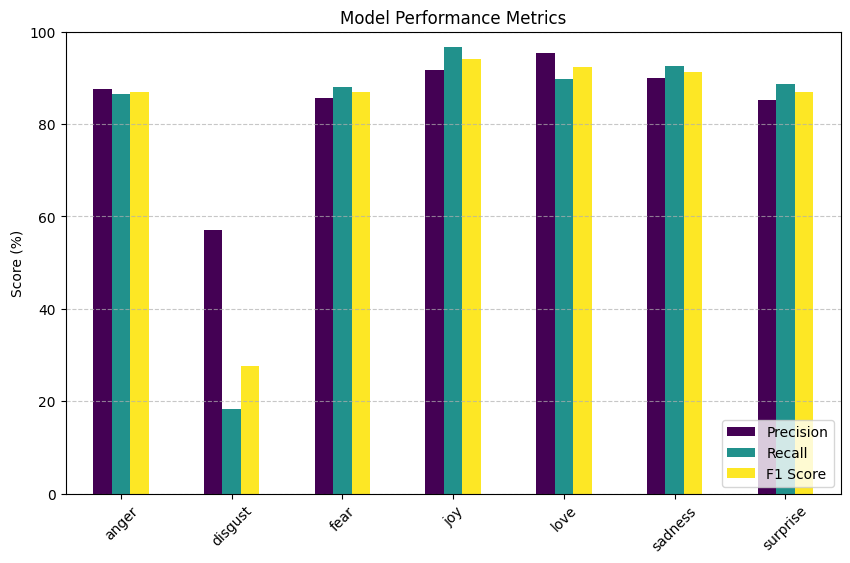

In [ ]:

# Generate classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Compute precision, recall, f1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true_classes, y_pred_classes, average=None)
labels = label_encoder.classes_  # Ensure correct label order

# Convert to DataFrame
metrics_df = pd.DataFrame({'Precision': precision * 100, 'Recall': recall * 100, 'F1 Score': f1_score * 100}, index=labels)

# Check if DataFrame is populated
print(metrics_df)

# Plot Performance Table (F1 Score, Recall, Precision)
plt.figure(figsize=(10, 6))
metrics_df.plot(kind='bar', colormap='viridis', ax=plt.gca())  # Use `ax=plt.gca()` for correct rendering
plt.ylim(0, 100)  # Ensure bars are visible
plt.title("Model Performance Metrics")
plt.ylabel("Score (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.show()


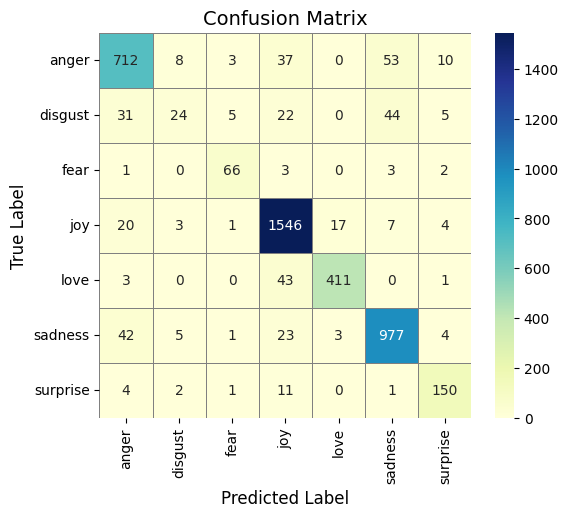

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Convert numerical labels to emotion labels
emotion_labels = label_encoder.classes_

# Set figure size
plt.figure(figsize=(6, 5))

# Plot confusion matrix with emotion labels
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5,
            linecolor='gray', xticklabels=emotion_labels, yticklabels=emotion_labels)

# Labels and title
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)

# Show plot
plt.show()